<a href="https://colab.research.google.com/github/YuZhen0702/Insurance-Claims-Forecast/blob/main/%E4%BF%9D%E9%9A%AA%E7%90%86%E8%B3%A0%E9%A0%90%E6%B8%AC%E5%B0%88%E6%A1%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 保險理賠預測2.xlsx to 保險理賠預測2.xlsx


In [ ]:
df = pd.read_excel('保險理賠預測2.xlsx')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9999 non-null   object 
 1   保單期間       9999 non-null   float64
 2   車齡         9999 non-null   float64
 3   持有人的年齡     9999 non-null   float64
 4   區域集群       9999 non-null   object 
 5   人口密度       9999 non-null   int64  
 6   汽車製造商      9999 non-null   int64  
 7   汽車分類       9999 non-null   object 
 8   汽車編碼名稱     9999 non-null   object 
 9   汽車使用的燃料類型  9999 non-null   object 
 10  汽車使用的引擎    9999 non-null   object 
 11  安全氣囊數量     9999 non-null   int64  
 12  安全評級       9999 non-null   int64  
 13  結果         9999 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB


In [ ]:
n=len(df.index)
n1=len(df[df.結果 == 1])
n0=len(df[df.結果 == 0])
print(n, n1, n0, n1/n, n0/n)

9999 643 9356 0.06430643064306431 0.9356935693569357


In [ ]:
dfcopy = df.copy()
dfsub1 = dfcopy[['區域集群', '汽車分類', '汽車編碼名稱', '汽車使用的燃料類型','汽車使用的引擎',]]

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder().set_output(transform="pandas")

# .set_output()設定編碼轉換後的輸出結果是一佪pandas的資料型態，
# 也就是output是一個 series 或者 DataFrame。
# 若未使 .set_output()，輸出結果會是一個 numpy.array

encoder.fit(dfsub1)
dftrans1 = encoder.transform(dfsub1)


dfcode = pd.DataFrame(dftrans1.values,
                    columns=['區域集群1', '汽車分類1',
                             '汽車編碼名稱1', '汽車使用的燃料類型1', '汽車使用的引擎1'])  #編碼後新欄位
print(dfcode)

      區域集群1  汽車分類1  汽車編碼名稱1  汽車使用的燃料類型1  汽車使用的引擎1
0       0.0    0.0      0.0         0.0       6.0
1      11.0    0.0      0.0         0.0       6.0
2      15.0    0.0      0.0         0.0       6.0
3      16.0    3.0      3.0         2.0       2.0
4      17.0    0.0      4.0         2.0       0.0
...     ...    ...      ...         ...       ...
9994   20.0    4.0      5.0         1.0       3.0
9995   11.0    1.0      9.0         0.0       9.0
9996   15.0    0.0      0.0         0.0       6.0
9997   15.0    0.0      4.0         2.0       0.0
9998    4.0    2.0      6.0         1.0       4.0

[9999 rows x 5 columns]


In [ ]:
dfcopy = pd.concat([dfcopy, dfcode], axis=1)

In [ ]:
dfcopy.isnull().sum()  #是否有遺失值

id            0
保單期間          0
車齡            0
持有人的年齡        0
區域集群          0
人口密度          0
汽車製造商         0
汽車分類          0
汽車編碼名稱        0
汽車使用的燃料類型     0
汽車使用的引擎       0
安全氣囊數量        0
安全評級          0
結果            0
區域集群1         0
汽車分類1         0
汽車編碼名稱1       0
汽車使用的燃料類型1    0
汽車使用的引擎1      0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
plt.rcParams['font.family'] = 'DejaVu Sans'
!fc-list :lang=zh family

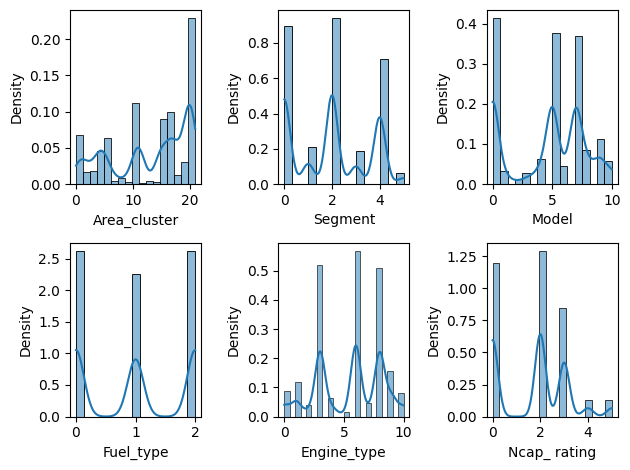

In [ ]:
#繪製次數分配圖，查看是否右偏，極端值嚴重。處理方式：對變數觀測值加1
plt.subplot(231)
sns.histplot(dfcode['區域集群1'], kde=True, stat="density")
plt.xlabel('Area_cluster')
plt.subplot(232)
sns.histplot(dfcode['汽車分類1'], kde=True, stat="density")
plt.xlabel('Segment')
plt.subplot(233)
sns.histplot(dfcode['汽車編碼名稱1'], kde=True, stat="density")
plt.xlabel('Model')
plt.subplot(234)
sns.histplot(dfcode['汽車使用的燃料類型1'], kde=True, stat="density")
plt.xlabel('Fuel_type')
plt.subplot(235)
sns.histplot(dfcode['汽車使用的引擎1'], kde=True, stat="density")
plt.xlabel('Engine_type')
plt.subplot(236)
sns.histplot(df['安全評級'], kde=True, stat="density")
plt.xlabel('Ncap_ rating')
# 調整子圖的排版
plt.tight_layout()

# 顯示圖表
plt.show()

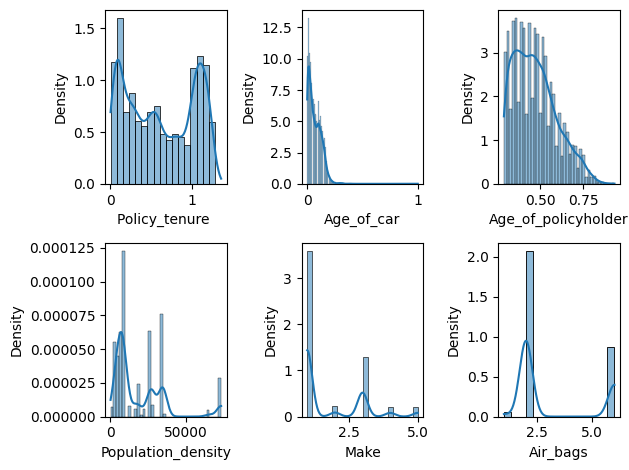

In [ ]:
plt.subplot(231)
sns.histplot(df['保單期間'], kde=True, stat="density")
plt.xlabel('Policy_tenure ')
plt.subplot(232)
sns.histplot(df['車齡'], kde=True, stat="density")
plt.xlabel('Age_of_car')
plt.subplot(233)
sns.histplot(df['持有人的年齡'], kde=True, stat="density")
plt.xlabel('Age_of_policyholder')
plt.subplot(234)
sns.histplot(df['人口密度'], kde=True, stat="density")
plt.xlabel('Population_density')
plt.subplot(235)
sns.histplot(df['汽車製造商'], kde=True, stat="density")
plt.xlabel('Make')
plt.subplot(236)
sns.histplot(df['安全氣囊數量'], kde=True, stat="density")
plt.xlabel('Air_bags')
# 調整子圖的排版
plt.tight_layout()


# 顯示圖表
plt.show()

In [ ]:
dfln1 = np.log(dfcopy[['保單期間', '車齡', '持有人的年齡',
                  '人口密度', '安全氣囊數量']] +1 )
dfln = pd.DataFrame(dfln1.values,
                    columns=['log_保單期間', 'log_車齡', 'log_持有人的年齡',
                             'log_人口密度', 'log_安全氣囊數量'])
dfln.head()

,log_保單期間,log_車齡,log_持有人的年齡,log_人口密度,log_安全氣囊數量
0,0.415992,0.048790,0.497273,8.515392,1.098612
1,0.514390,0.019803,0.318454,10.203740,1.098612
2,0.610369,0.019803,0.325422,8.313117,1.098612
3,0.641999,0.104360,0.359555,9.981513,1.098612
4,0.467753,0.104360,0.491408,10.455618,1.098612


In [ ]:
dfcopy = pd.concat([dfcopy, dfln], axis=1)

In [ ]:
dfcopy.columns

Index(['id', '保單期間', '車齡', '持有人的年齡', '區域集群', '人口密度', '汽車製造商', '汽車分類', '汽車編碼名稱',
       '汽車使用的燃料類型', '汽車使用的引擎', '安全氣囊數量', '安全評級', '結果', '區域集群1', '汽車分類1',
       '汽車編碼名稱1', '汽車使用的燃料類型1', '汽車使用的引擎1', 'log_保單期間', 'log_車齡', 'log_持有人的年齡',
       'log_人口密度', 'log_安全氣囊數量', 'log_保單期間', 'log_車齡', 'log_持有人的年齡',
       'log_人口密度', 'log_安全氣囊數量'],
      dtype='object')

In [ ]:
dfcorr = dfcopy[[ '保單期間', '車齡', '持有人的年齡',  '人口密度', '汽車製造商',
        '安全氣囊數量', '安全評級', '結果', '區域集群1', '汽車分類1',
       '汽車編碼名稱1', '汽車使用的燃料類型1', '汽車使用的引擎1', 'log_保單期間', 'log_車齡', 'log_持有人的年齡',
       'log_人口密度', 'log_安全氣囊數量']]
dfcorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   保單期間        9999 non-null   float64
 1   車齡          9999 non-null   float64
 2   持有人的年齡      9999 non-null   float64
 3   人口密度        9999 non-null   int64  
 4   汽車製造商       9999 non-null   int64  
 5   安全氣囊數量      9999 non-null   int64  
 6   安全評級        9999 non-null   int64  
 7   結果          9999 non-null   int64  
 8   區域集群1       9999 non-null   float64
 9   汽車分類1       9999 non-null   float64
 10  汽車編碼名稱1     9999 non-null   float64
 11  汽車使用的燃料類型1  9999 non-null   float64
 12  汽車使用的引擎1    9999 non-null   float64
 13  log_保單期間    9999 non-null   float64
 14  log_保單期間    9999 non-null   float64
 15  log_車齡      9999 non-null   float64
 16  log_車齡      9999 non-null   float64
 17  log_持有人的年齡  9999 non-null   float64
 18  log_持有人的年齡  9999 non-null   float64
 19  log_人口密度    9999 non-null  

In [ ]:
dfcorr.describe()

,保單期間,車齡,持有人的年齡,人口密度,汽車製造商,安全氣囊數量,安全評級,結果,區域集群1,汽車分類1,...,log_保單期間,log_保單期間,log_車齡,log_車齡,log_持有人的年齡,log_持有人的年齡,log_人口密度,log_人口密度,log_安全氣囊數量,log_安全氣囊數量
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.612174,0.069390,0.471263,18913.863686,1.765277,3.135314,1.751775,0.064306,13.053905,1.928293,...,0.443152,0.443152,0.065714,0.065714,0.382714,0.382714,9.433831,9.433831,1.335071,1.335071
std,0.414327,0.057047,0.123028,17862.167035,1.142747,1.832120,1.405840,0.245310,6.839865,1.564816,...,0.265245,0.265245,0.052028,0.052028,0.082060,0.082060,0.958181,0.958181,0.393726,0.393726
min,0.002739,0.000000,0.288462,290.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.002735,0.002735,0.000000,0.000000,0.253449,0.253449,5.673323,5.673323,0.693147,0.693147
25%,0.213224,0.020000,0.375000,6112.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.000000,...,0.193282,0.193282,0.019803,0.019803,0.318454,0.318454,8.718173,8.718173,1.098612,1.098612
50%,0.571427,0.060000,0.451923,8794.000000,1.000000,2.000000,2.000000,0.000000,15.000000,2.000000,...,0.451984,0.451984,0.058269,0.058269,0.372889,0.372889,9.081939,9.081939,1.098612,1.098612
75%,1.041082,0.110000,0.548077,27003.000000,3.000000,6.000000,3.000000,0.000000,20.000000,4.000000,...,0.713480,0.713480,0.104360,0.104360,0.437013,0.437013,10.203740,10.203740,1.945910,1.945910
max,1.363011,1.000000,0.932692,73430.000000,5.000000,6.000000,5.000000,1.000000,21.000000,5.000000,...,0.859937,0.859937,0.693147,0.693147,0.658914,0.658914,11.204101,11.204101,1.945910,1.945910


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 20445 (\N{CJK UNIFIED IDEOGRAPH-4FDD}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 36554 (\N{CJK UNIFIED IDEOGRAPH-8ECA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 40801 (\N{CJK UNIFIED IDEOGRAPH-9F61}) missing from current font.
  fig.canvas.draw()
/usr

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20445 (\N{CJK UNIFIED IDEOGRAPH-4FDD}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36554 (\N{CJK UNIFIED IDEOGRAPH-8ECA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 40801 (\N{CJK UNIFIED IDEOGRAPH-9F

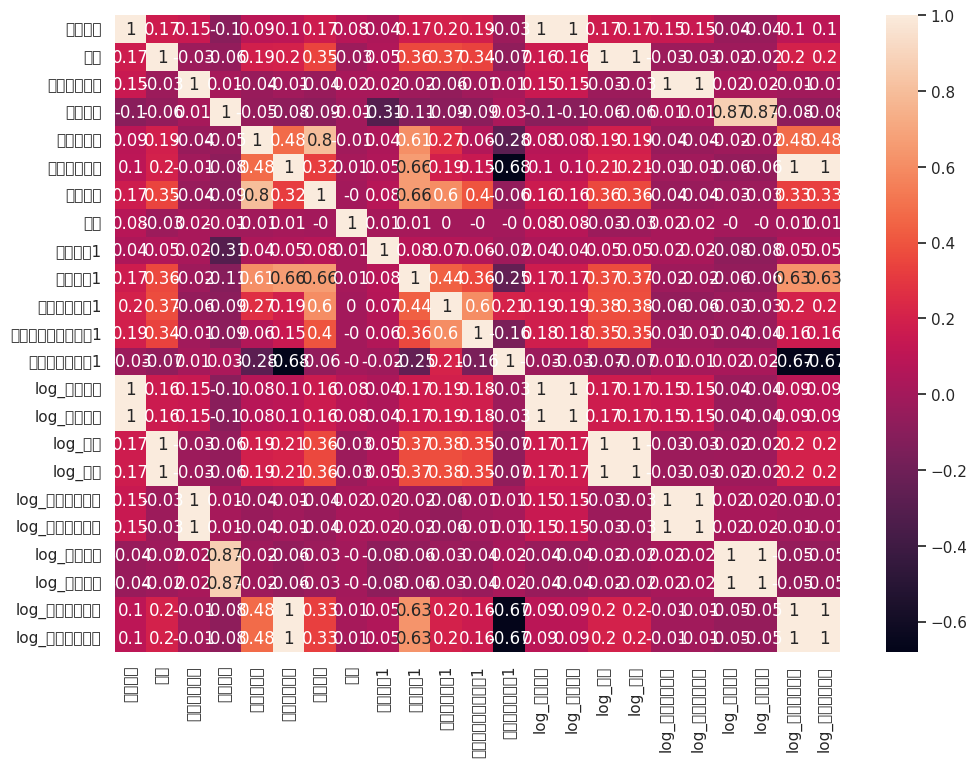

In [ ]:
correlation_matrix = dfcorr.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

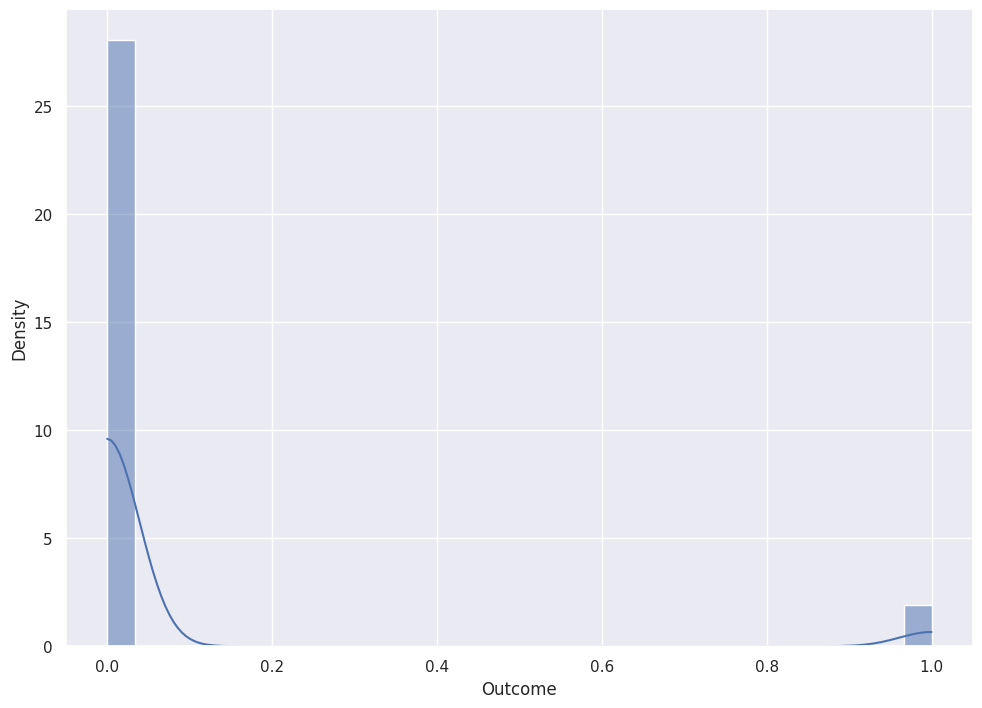

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.histplot(dfcorr['結果'], kde=True, stat="density", bins=30)
plt.xlabel('Outcome')
plt.show()

In [ ]:
dfcorr.columns

Index(['保單期間', '車齡', '持有人的年齡', '人口密度', '汽車製造商', '安全氣囊數量', '安全評級', '結果',
       '區域集群1', '汽車分類1', '汽車編碼名稱1', '汽車使用的燃料類型1', '汽車使用的引擎1', 'log_保單期間',
       'log_保單期間', 'log_車齡', 'log_車齡', 'log_持有人的年齡', 'log_持有人的年齡', 'log_人口密度',
       'log_人口密度', 'log_安全氣囊數量', 'log_安全氣囊數量'],
      dtype='object')

In [ ]:
X = dfcorr[[ '汽車製造商',
         '安全評級', '區域集群1', '汽車分類1',
       '汽車編碼名稱1', '汽車使用的燃料類型1', '汽車使用的引擎1', 'log_保單期間',
       'log_車齡', 'log_持有人的年齡', 'log_人口密度', 'log_安全氣囊數量']]

y = dfcorr['結果']

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=101)  #test_size=0.2測試資料的20%

print(len(y_train[y_train==1])/len(y_train))
print(len(y_test[y_test==1])/len(y_test))
print(len(y_test)/len(y))
print('使用train_test_split之後，在y_train與y_test兩資料集之中，y=1的比例仍保持一樣')

0.06400800100012502
0.0655
0.2000200020002
使用train_test_split之後，在y_train與y_test兩資料集之中，y=1的比例仍保持一樣


In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lm = LogisticRegression(max_iter=5000) # 最大迭代次數= 5000 次。

# 假設你希望選擇 3 到 X_train.shape[1] 個特徵
min_features = 5
max_features = X_train.shape[1]

# 建立 step forward 特徵選擇
sfs1 = sfs(lm,
           k_features=(min_features, max_features),
           forward=True,
           verbose=0,
           scoring='accuracy',
           cv=5)
sfs1.fit(X_train, y_train)

sc = sfs1.k_score_
feat_cols = list(sfs1.k_feature_names_)

In [ ]:
print(feat_cols)

['汽車製造商', '安全評級', '區域集群1', '汽車分類1', '汽車編碼名稱1']


In [ ]:
X_train = X_train[['汽車製造商', '安全評級', '區域集群1', '汽車分類1', '汽車編碼名稱1']]

X_test = X_test[['汽車製造商', '安全評級', '區域集群1', '汽車分類1', '汽車編碼名稱1']]

lm.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [ ]:
# 輸出迴歸式的估計結果
# 如果式子如同 y = a + bx，則 a即是截距，而 b是變數 x的係數

# 取得截距。
print(lm.intercept_)

# 取得迴歸係數，並用 Data Frame顯示
print(lm.coef_)

[-2.55253711]
[[-0.15043428  0.08451704  0.00020344  0.05078866 -0.02516608]]


In [ ]:
variables= X_train.columns
cdf = pd.DataFrame(lm.coef_.T, index=variables, columns=['Coef'])
print(cdf)

             Coef
汽車製造商   -0.150434
安全評級     0.084517
區域集群1    0.000203
汽車分類1    0.050789
汽車編碼名稱1 -0.025166


In [ ]:
predictions = lm.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]


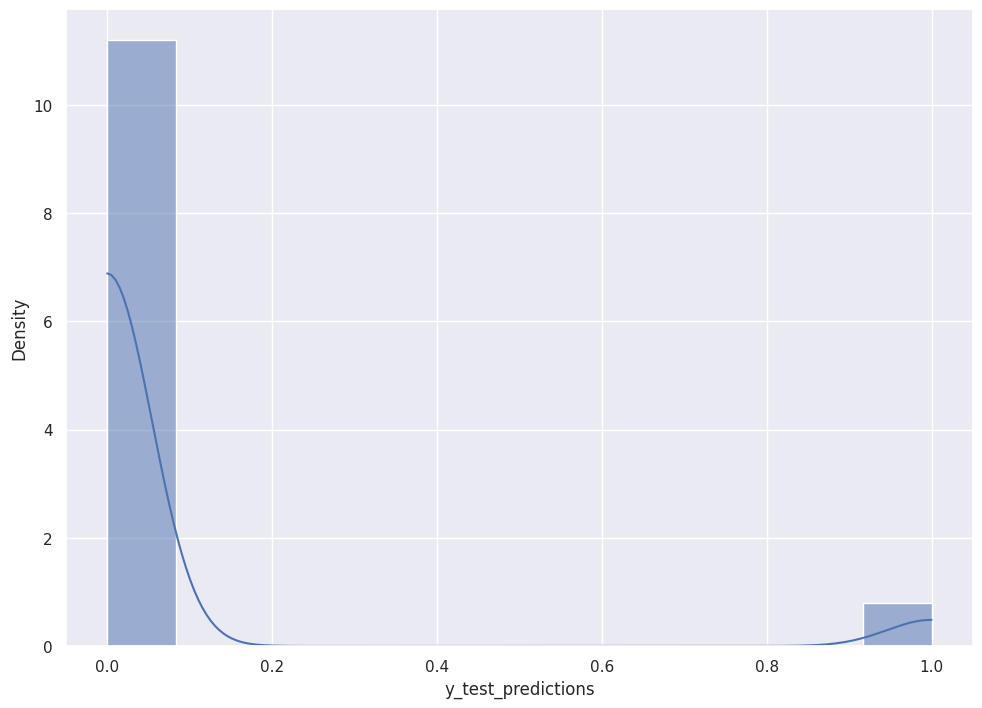

In [ ]:
sns.histplot((y_test-predictions), kde=True, stat="density")
plt.xlabel('y_test_predictions')
plt.show()

In [ ]:
from sklearn import metrics

# Mean Absolute Error (MAE)代表平均誤差，公式為所有實際值及預測值相減的絕對值平均。
MAE = metrics.mean_absolute_error(y_test, predictions)
print('MAE (testing set):', MAE)

MAE (testing set): 0.0655


In [ ]:
predict_train = lm.predict(X_train)
print(predict_train)

MAE_train = metrics.mean_absolute_error(y_train,predict_train)
print('MAE (training set):', MAE_train)

[0 0 0 ... 0 0 0]
MAE (training set): 0.06400800100012502


In [ ]:
MSE = metrics.mean_squared_error(y_test,predictions)
print('MSE (testing set):', MSE)
MSE_train = metrics.mean_squared_error(y_train,predict_train)
print('MSE (training set):', MSE_train)
RMSE = np.sqrt(MSE)
print('RMSE (testing set):', RMSE)
RMSE_train = np.sqrt(MSE_train)
print('RMSE (training set):', RMSE_train)
Score = lm.score(X_test, y_test)
print("Score (testing set):", Score)
Score_train = lm.score(X_train, y_train)
print("Score (training set):", Score_train)

MSE (testing set): 0.0655
MSE (training set): 0.06400800100012502
RMSE (testing set): 0.25592967784139453
RMSE (training set): 0.2529980256842433
Score (testing set): 0.9345
Score (training set): 0.935991998999875


In [ ]:
Score_train = lm.score(X_train, y_train)
print("Score (training set):", Score_train)

Score (training set): 0.935991998999875


In [ ]:
#混淆矩陣
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print((tn, fp, fn, tp))
type((tn, fp, fn, tp))


(1869, 0, 131, 0)


tuple

In [ ]:
cfs_matrix = confusion_matrix(y_test,predictions)
print(cfs_matrix)
type(cfs_matrix)

[[1869    0]
 [ 131    0]]


numpy.ndarray

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, predictions)
print('The accuracy (testing set):', accuracy)

The accuracy (testing set): 0.9345


In [ ]:
print('Y預測值(Testing dataset): ', predictions)
print('Y預測值(Training dataset): ', predict_train)

Y預測值(Testing dataset):  [0 0 0 ... 0 0 0]
Y預測值(Training dataset):  [0 0 0 ... 0 0 0]


In [ ]:
prob_predictions = lm.predict_proba(X_test)
print('測試資料集', '[Y=0的機率  Y=1的機率]: ', prob_predictions, sep='\n')


測試資料集
[Y=0的機率  Y=1的機率]: 
[[0.93222912 0.06777088]
 [0.92922526 0.07077474]
 [0.93935487 0.06064513]
 ...
 [0.94640971 0.05359029]
 [0.95127632 0.04872368]
 [0.93936154 0.06063846]]


In [ ]:
prob_predict_train = lm.predict_proba(X_train)
print('訓練資料集', '[Y=0的機率  Y=1的機率]: ', prob_predict_train, sep='\n')

訓練資料集
[Y=0的機率  Y=1的機率]: 
[[0.94727545 0.05272455]
 [0.94806016 0.05193984]
 [0.93889983 0.06110017]
 ...
 [0.91860088 0.08139912]
 [0.93889679 0.06110321]
 [0.92813445 0.07186555]]


In [ ]:
# 過度抽樣(over sampling)或分層抽樣(stratified sampling)後的機率
# P(Y=1)= 0.5, P(Y=0)= 0.5
p1_over = 0.5
p0_over = 1 - p1_over

# 原來的事前機率 P(Y=1)= 0.05, P(Y=0)= 0.95
p1_prior = 0.05
p0_prior = 1 - p1_prior

# 若之前有做分層抽樣(stratified sampling)，有算得 TargetB=1 的事前機率pp1,
# 以及TargetB=0 的事前機率pp0，則
# p1_prior = pp1
# p0_prior = pp0

In [ ]:
pr_predict = prob_predictions.copy()

In [ ]:
# 使用事前機率調整機率預測值

# pr_predict[:,1] is a numpy array
# numpy.ndarray 乘或除一個數字，該數字會與array內的每一個元素相乘或除。

a = pr_predict[:,1] * p1_prior / p1_over
b = pr_predict[:,0] * p0_prior / p0_over

# 用事前機率調過的 Y=1的機率預測值
p1 = a/(a+b)
print('Y=1的機率: ', p1, sep='\n')
print(len(p1))

# 用事前機率調過後的 Y=0的機率預測值
p0 = b/(a+b)
print('Y=0的機率: ', p0, sep='\n')
print(len(p0))

print('以上是測試資料集的機率預測值')

Y=1的機率: 
[0.00381161 0.0039927  0.00338641 ... 0.0029714  0.0026885  0.00338601]
2000
Y=0的機率: 
[0.99618839 0.9960073  0.99661359 ... 0.9970286  0.9973115  0.99661399]
2000
以上是測試資料集的機率預測值
